<a href="https://colab.research.google.com/github/tirth-hihoriya/CPP_World/blob/master/TH_SHAPE_tensorflow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Author`: Tirth Hihoriya
# `Date`: 12th Jan 2022
# `Label`: SHAPE
<hr>


In [ ]:
!python --version

Python 3.7.12


## Mount Drive
- Time: 20s

In [ ]:
%%time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 21.5 ms, sys: 1.1 ms, total: 22.6 ms
Wall time: 3.07 s


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import time
import shutil

import os

import logging

import matplotlib.pyplot as plt
import tensorflow as tf


print('Tenserflow version : ',tf.__version__)

Tenserflow version :  2.7.0


## Dataset for `SHAPE`

- `9135` diamond images (`TOP` view)
- **`!rm -rf /content/gia_images`** if you want to delete `gia_images` folder
- Time : 1min 10s

In [ ]:
%%time
dataset_dir = "/content/drive/MyDrive/V360 Data Set/SHAPE_Dataset/"

all_gia_numbers = os.listdir(dataset_dir)
number_of_diamonds = len(all_gia_numbers)
print(f'Number of diamonds unrared = {number_of_diamonds}\n')

Number of diamonds unrared = 9135

CPU times: user 189 ms, sys: 31 ms, total: 220 ms
Wall time: 1min 9s


###  Reading the `CSV` with all the `gia_numbers`(diamonds) and their labels.
- requires `pandas` library

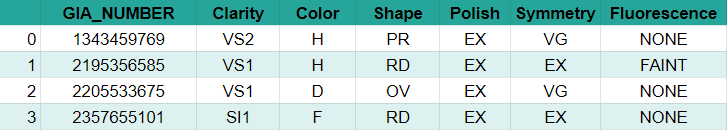


In [ ]:
working_dir = "/content/drive/MyDrive/V360 Data Set/"
csv_file_name = 'FINAL_9135_GIA_NUMBER_LIST_LABEL_CCSFPS.csv'
path_csv = f'{working_dir}{csv_file_name}'

gia_data = pd.read_csv(path_csv, index_col=0)
gia_data.head()

,GIA_NUMBER,Clarity,Color,Shape,Polish,Symmetry,Fluorescence
0,1343459769,VS2,H,PR,EX,VG,NONE
1,2195356585,VS1,H,RD,EX,EX,FAINT
2,2205533675,VS1,D,OV,EX,VG,NONE
3,2357655101,SI1,F,RD,EX,EX,NONE
4,5323820403,VS2,G,PR,EX,VG,NONE


### Distribution of `SHAPE` label among 9135 diamonds into different classes

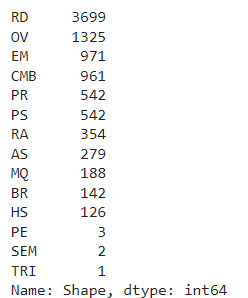

In [ ]:
gia_data.Shape.value_counts()

RD     3699
OV     1325
EM      971
CMB     961
PR      542
PS      542
RA      354
AS      279
MQ      188
BR      142
HS      126
PE        3
SEM       2
TRI       1
Name: Shape, dtype: int64

In [ ]:
%%time
shape_classes = ['RD','OV','EM','CMB','PR','PS','RA','AS','MQ','BR','HS']  # 11 classes
# class_not_dealing = ['PE','SEM','TRI']  # 3 classes

distribution = {}

#initialse dictionary with empty list for all classes
for shape_class in shape_classes:
    distribution[shape_class] = []

#classify gia_numbers based on shape_class
for index,row in gia_data.iterrows():
    if row['Shape'] in shape_classes:
        distribution[row['Shape']].append(row['GIA_NUMBER'])

CPU times: user 649 ms, sys: 0 ns, total: 649 ms
Wall time: 650 ms


In [ ]:
%%time
random.seed(10)

number_of_diamonds_per_class = 125

#list initialization
train_gia_list = []
test_gia_list  = []

for shape_classs, gia_list in distribution.items(): 
    random.shuffle(gia_list)
    train_gia_list.extend(gia_list[:int(number_of_diamonds_per_class*train_test_ratio)])
    test_gia_list.extend(gia_list[-(int(number_of_diamonds_per_class*(1-train_test_ratio)))-1:])

print('Train set size : ', len(train_gia_list))
print('Test set size : ', len(test_gia_list))

## Spliting the diamonds into `Train` and `Test` sets

In [ ]:
%%time
random.seed(10)

number_of_diamonds_per_class = 125
train_test_ratio = 0.8

#list initialization
train_gia_list = []
test_gia_list  =[]

for shape_classs, gia_list in distribution.items(): 
    random.shuffle(gia_list)
    train_gia_list.extend(gia_list[:int(number_of_diamonds_per_class*train_test_ratio)])
    test_gia_list.extend(gia_list[-(int(number_of_diamonds_per_class*(1-train_test_ratio)))-1:])

print('Train set size : ', len(train_gia_list))
print('Test set size : ', len(test_gia_list))

Train set size :  1100
Test set size :  275
CPU times: user 6.52 ms, sys: 0 ns, total: 6.52 ms
Wall time: 6.41 ms


## Divide into `Train` and `Test` folder
 - Time: 8m 10s

In [ ]:
%%time
train_dir = '/content/train_set/'
test_dir = '/content/test_set/'

if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

print('Start...\n')
for gia in train_gia_list:
    shutil.copyfile(f'{dataset_dir}{gia}.png',f'{train_dir}{gia}.png')
for gia in test_gia_list:
    shutil.copyfile(f'{dataset_dir}{gia}.png',f'{test_dir}{gia}.png')
print('...Complete')

Start...

...Complete
CPU times: user 1.71 s, sys: 636 ms, total: 2.35 s
Wall time: 8min 9s
